# PBMC

In [1]:
setwd('/gpfs/gibbs/pi/zhao/xs272/prep_pipeline/')
library(Matrix)
library(readr)
source('/gpfs/gibbs/pi/zhao/xs272/data_preprocess/utils.r')
source('/gpfs/gibbs/pi/zhao/xs272/Multiomics/sc_benchmark/scripts/utils.r')

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    

## 1. Unimodal RNA preprocessing

In [4]:
data.path <- '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC'

In [2]:
rna.counts <- readRDS(file.path(data.path, 'RNA/scRNA_gene_by_cell_count.rds'))

In [3]:
rna.annot.tab <- read.csv(file.path(data.path, 'RNA/scRNA_metadata_filtered.csv'))

In [4]:
rna.annot <- rna.annot.tab$annotation
names(rna.annot) <- rna.annot.tab$X

In [5]:
rna.annot.cells <- intersect(names(rna.annot), colnames(rna.counts))

In [6]:
rna.annot <- rna.annot[rna.annot.cells]
rna.counts <- rna.counts[, rna.annot.cells]

In [7]:
any(duplicated(colnames(rna.counts)))

[1] FALSE

In [8]:
any(duplicated(rownames(rna.counts)))

[1] FALSE

In [9]:
any(is.na((rna.counts)))

[1] FALSE

In [ ]:
rna.path <- 'PBMC/RNA/'
write.counts.transpose(rna.counts, rna.path)
write.annotation(rna.annot, rna.path)

In [10]:
rna.annot

PBMC_10x_GREENLEAF_REP1:AAACCCAAGATTGTGA-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACCCACATCGGTTA-1 
                          "11_CD14.Mono.1" 
PBMC_10x_GREENLEAF_REP1:AAACCCAGTACCGCGT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACCCAGTCGTCATA-1 
                                   "25_NK" 
PBMC_10x_GREENLEAF_REP1:AAACCCAGTCTACACA-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACCCAGTGCAAGAC-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACCCAGTGCATTTG-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACCCATCCGATGTA-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACCCATCTCAACGA-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACCCATCTCTCGAC-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACGAACAATCGTCA-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACGAACACGATTCA-1 
                                "22_CD4.M" 
PBMC_10x_GREENLEAF_REP1:AAACGAACAGCTGTCG-1 
                                    "17_B" 
PBMC_10x_GREENLEAF_REP1:AAACGAACAGGATCTT-1 
                               "23_CD8.EM" 
PBMC_10x_GREENLEAF_REP1:AAACGAACATTGTAGC-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACGAAGTGATTAGA-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACGAAGTTGGGATG-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACGAATCAGAACCT-1 
                                "19_CD8.N" 
PBMC_10x_GREENLEAF_REP1:AAACGCTAGACATAGT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACGCTAGAGGCGTT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACGCTCAGACAATA-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAACGCTCAGTTAAAG-1 
                          "11_CD14.Mono.1" 
PBMC_10x_GREENLEAF_REP1:AAACGCTGTAGCACAG-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAACGCTGTGCTATTG-1 
                                "19_CD8.N" 
PBMC_10x_GREENLEAF_REP1:AAACGCTGTGTGTACT-1 
                               "24_CD8.CM" 
PBMC_10x_GREENLEAF_REP1:AAACGCTTCGGCCTTT-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGAACAGGATTCCT-1 
                                    "17_B" 
PBMC_10x_GREENLEAF_REP1:AAAGAACAGGTAGACC-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAAGAACCACTGTGAT-1 
                                "22_CD4.M" 
PBMC_10x_GREENLEAF_REP1:AAAGAACCACTGTGTA-1 
                                    "17_B" 
PBMC_10x_GREENLEAF_REP1:AAAGAACGTAACGTTC-1 
                                "22_CD4.M" 
PBMC_10x_GREENLEAF_REP1:AAAGAACGTACAGTTC-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGAACTCTGTCAGA-1 
                                  "26_Unk" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGAAGCGCT-1 
                               "20_CD4.N1" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGCAGGCTA-1 
                                "22_CD4.M" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGCAGTAAT-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGCGTCTCG-1 
                                "19_CD8.N" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGCTTGTGT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGTACTCGT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATAGTCGCGAA-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATCAACTAGAA-1 
                                  "10_cDC" 
PBMC_10x_GREENLEAF_REP1:AAAGGATCACAACGCC-1 
                                "22_CD4.M" 
PBMC_10x_GREENLEAF_REP1:AAAGGATCACCGAATT-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATCATCATCTT-1 
                          "12_CD14.Mono.2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATCATCCCGTT-1 
                               "21_CD4.N2" 
PBMC_10x_GREENLEAF_REP1:AAAGGATGTATACAGA

In [11]:
rna.counts

   [[ suppressing 32 column names 'PBMC_10x_GREENLEAF_REP1:AAACCCAAGATTGTGA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCACATCGGTTA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCAGTACCGCGT-1' ... ]]

   [[ suppressing 32 column names 'PBMC_10x_GREENLEAF_REP1:AAACCCAAGATTGTGA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCACATCGGTTA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCAGTACCGCGT-1' ... ]]

   [[ suppressing 32 column names 'PBMC_10x_GREENLEAF_REP1:AAACCCAAGATTGTGA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCACATCGGTTA-1', 'PBMC_10x_GREENLEAF_REP1:AAACCCAGTACCGCGT-1' ... ]]



20287 x 14772 sparse Matrix of class "dgCMatrix"
                                                                                             
FAM138A        .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
OR4F5          .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
AL627309.1     .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
OR4F29         .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
OR4F16         .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
FAM87B         .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
LINC00115      .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   1 . .  1  .   .  1 .
FAM41C         1   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   1   . . .  .  1   .  . .
AL645608.2     .   .  .  .  .  .  . . . . .  . .  .  . . . .  .  .   .   . . .  .  .   .  . .
SAMD11     

## 2. Unimodal ATAC counts

In [50]:
atac.count <- readRDS(file.path(data.path, 'ATAC/scATAC_gene_by_cell_peak.rds'))

In [51]:
any(duplicated(colnames(atac.count)))

[1] FALSE

In [52]:
atac.annot.tab <- read.csv(file.path(data.path, 'ATAC/scATAC_metadata_filtered.csv'))

In [53]:
atac.raw.counts <- readRDS(file.path(data.path, 'ATAC/raw/scATAC-Healthy-Hematopoiesis-peak.rds'))

In [54]:
rownames(atac.count) <- rownames(atac.raw.counts)

In [55]:
any(is.na(rownames(atac.count)))

[1] FALSE

In [56]:
atac.annot <- atac.annot.tab$annotation
names(atac.annot) <- atac.annot.tab$X

In [57]:
print.names.match(colnames(atac.count), atac.annot.tab$X)

[1] "Length1, Length2, Length intersection:"
[1] "8368 8357 8357"


In [58]:
atac.annot.cells <- intersect(names(atac.annot), colnames(atac.count))

In [59]:
length(atac.annot.cells)

[1] 8357

In [60]:
atac.annot <- atac.annot[atac.annot.cells]
atac.count <- atac.count[, atac.annot.cells]

In [61]:
atac.count <- set.names(counts = atac.count, 
                        rowname = format.peaks(rownames(atac.count)), 
                        colname = atac.annot.cells, 
                        allow.duplicate = TRUE)
names(atac.annot) <- atac.annot.cells

In [160]:
pbmc.atac.path <- 'PBMC/ATAC'
write.counts.transpose(atac.count, pbmc.atac.path)
write.annotation(atac.annot, pbmc.atac.path)

Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/ATAC' already exists"
Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/ATAC' already exists"


## 3. Unimodal ATAC fragment file

In [2]:
frag.path <- "/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/fragments/"
frag.files <- c(
                PBMC_D10T1 = 'GSM4138893_scATAC_PBMC_D10T1.fragments.tsv.gz',
                PBMC_D12T1 = 'GSM4138895_scATAC_PBMC_D12T1.fragments.tsv.gz',
                PBMC_D12T3 = 'GSM4138897_scATAC_PBMC_D12T3.fragments.tsv.gz',
                PBMC_D11T1 = 'GSM4138894_scATAC_PBMC_D11T1.fragments.tsv.gz',
                PBMC_D12T2 = 'GSM4138896_scATAC_PBMC_D12T2.fragments.tsv.gz'
                )

In [47]:
# need to change space to \t? first do not change, see if it works.
# system(paste('bash frag_prep.sh -i', infile, '-o', outfolder, '-z', '-s', sep=' '))

## 4. Unimodal gene activity (scATAC-seq)

In [31]:
# genome annotations
library(EnsDb.Hsapiens.v75) # hg19
library(Signac)
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)
seqlevelsStyle(annotations) <- 'UCSC'

Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objec

In [35]:
atac.ga.counts.list <- list()
for (tissue in names(frag.files)) {
    selected.id <- which(atac.annot.tab$Group == tissue)
    selected.count <- atac.count[, selected.id]
    colnames(selected.count) <- atac.annot.tab[selected.id, ]$Barcode
    selected.frag.path <- file.path(frag.path, frag.files[tissue])
    selected.ga <- convert.gene.activtity(selected.count, selected.frag.path, annotations, genome='hg19')
    colnames(selected.ga) <- atac.annot.tab[selected.id, ]$X
    atac.ga.counts.list[[tissue]] <- selected.ga
}

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"
Extracting gene coordinates

Extracting reads overlapping genomic regions

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"
Extracting gene coordinates

Extracting reads overlapping genomic regions

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"
Extracting gene coordinates

Extracting reads overlapping genomic regions

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"
Extracting gene coordinates

Extracting reads overlapping genomic regions

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, sett

In [36]:
atac.ga.counts <- do.call(cbind, atac.ga.counts.list)
atac.ga.counts <- atac.ga.counts[, atac.annot.tab$X]

In [73]:
# Check cell barcodes
identical(colnames(atac.ga.counts), names(atac.annot))

[1] TRUE

In [106]:
# Check gene names
any(duplicated(rownames(atac.ga.counts)))

[1] TRUE

In [108]:
# Remove duplicated genes
atac.ga.counts <- atac.ga.counts[!duplicated(rownames(atac.ga.counts)), ]
any(duplicated(rownames(atac.ga.counts)))

[1] FALSE

In [109]:
print.names.match(rownames(atac.ga.counts), readLines('PBMC/RNA/genes.txt'))

[1] "Length1, Length2, Length intersection:"
[1] "20007 20287 18089"


In [110]:
atac.path <- 'PBMC/ATAC-gene-activities/'
write.counts.transpose(atac.ga.counts, atac.path)
write.annotation(atac.annot, atac.path)

Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/ATAC-gene-activities' already exists"
Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/ATAC-gene-activities' already exists"


## 5. Multiome data preprocess: filter cells

In [75]:
counts.multi <- Read10X_h5(file.path(data.path, 'multiome/hg19/filtered_feature_bc_matrix.h5'))
fragpath <- file.path(data.path, "multiome/hg19/atac_fragments.tsv.gz")

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [77]:
names(counts.multi)

[1] "Gene Expression" "Peaks"

In [86]:
# get gene annotations for hg19
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)
seqlevelsStyle(annotation) <- "UCSC"

# create a Seurat object containing the RNA adata
pbmc <- CreateSeuratObject(
  counts = counts.multi$`Gene Expression`,
  assay = "RNA"
)

# create ATAC assay and add it to the object
pbmc[["ATAC"]] <- CreateChromatinAssay(
  counts = counts.multi$Peaks,
  sep = c(":", "-"),
  fragments = fragpath,
  annotation = annotation
)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing hash



In [87]:
DefaultAssay(pbmc) <- "ATAC"

# compute nucleosome signal score per cell
pbmc <- NucleosomeSignal(pbmc)
# compute TSS enrichment score per cell
pbmc <- TSSEnrichment(pbmc)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



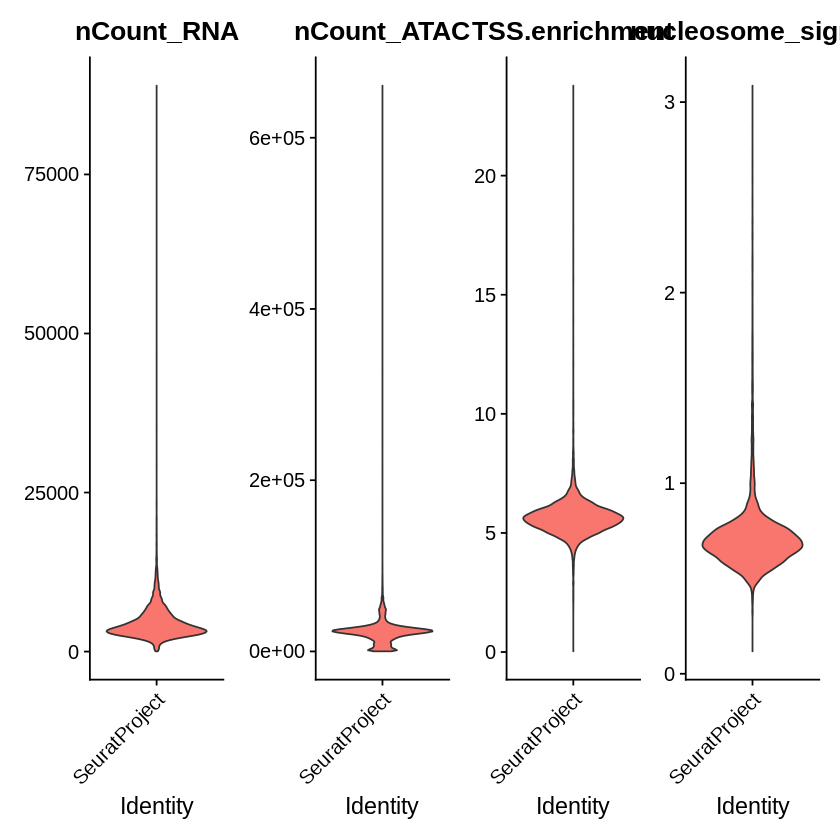

In [88]:
VlnPlot(
  object = pbmc,
  features = c("nCount_RNA", "nCount_ATAC", "TSS.enrichment", "nucleosome_signal"),
  ncol = 4,
  pt.size = 0
)

In [89]:
# filter out low quality cells
pbmc <- subset(
  x = pbmc,
  subset = nCount_ATAC < 100000 &
    nCount_RNA < 25000 &
    nCount_ATAC > 1000 &
    nCount_RNA > 1000 &
    nucleosome_signal < 2 &
    TSS.enrichment > 1
)
pbmc

An object of class Seurat 
204272 features across 11448 samples within 2 assays 
Active assay: ATAC (143614 features, 0 variable features)
 1 other assay present: RNA

## 6. Multi ATAC preprocess: fix peaks

In [90]:
multi.atac.counts <- pbmc[['ATAC']]@counts

In [92]:
rownames(multi.atac.counts) <- format.peaks(rownames(multi.atac.counts))

## 7. Multi RNA preprocess

In [93]:
multi.rna.counts <- pbmc[['RNA']]@counts

#### Check if feature sets have large overlap with single RNA

In [94]:
print.names.match(readLines('PBMC/RNA/genes.txt'), rownames(multi.rna.counts))

[1] "Length1, Length2, Length intersection:"
[1] "20287 60658 19058"


## 8. Align multi ATAC and RNA

In [95]:
identical(colnames(multi.rna.counts), colnames(multi.atac.counts))

[1] TRUE

In [99]:
# 10x RNA
write.counts.transpose(multi.rna.counts, 'PBMC/10x/RNA/')
#10x ATAC
write.counts.transpose(multi.atac.counts, 'PBMC/10x/ATAC/')

Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/10x/RNA' already exists"
Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/10x/ATAC' already exists"


## 9. Map unimodal ATAC peaks to multi ATAC peaks

In [59]:
library(EnsDb.Hsapiens.v75) # hg19
library(Signac)
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [121]:
mapped.atac.counts.list <- list()
for (tissue in names(frag.files)) {
    selected.id <- which(atac.annot.tab$Group == tissue)
    selected.count <- atac.count[, selected.id]
    colnames(selected.count) <- atac.annot.tab[selected.id, ]$Barcode
    stopifnot(!any(duplicated(colnames(selected.count))))
    selected.frag.path <- file.path(frag.path, frag.files[tissue])
    mapped.cnt <- map.peaks(selected.count, multi.atac.counts, selected.frag.path, annotations)
    mapped.cnt <- set.names(counts = mapped.cnt, colname = atac.annot.tab$X[selected.id], rowname = rownames(mapped.cnt))
    mapped.atac.counts.list[[tissue]] <- mapped.cnt
}

Computing hash

Extracting reads overlapping genomic regions

Computing hash

Extracting reads overlapping genomic regions

Computing hash

Extracting reads overlapping genomic regions

Computing hash

Extracting reads overlapping genomic regions

Computing hash

Extracting reads overlapping genomic regions



In [122]:
# taking intersection of peaks among tissues
intersect.peaks <- rownames(mapped.atac.counts.list[[1]])
for (i in 2:length(mapped.atac.counts.list)) {
    intersect.peaks <- intersect(intersect.peaks, rownames(mapped.atac.counts.list[[i]]))
}

for (tissue in names(mapped.atac.counts.list)) {
    mapped.atac.counts.list[[tissue]] <- mapped.atac.counts.list[[tissue]][intersect.peaks ,]
}

mapped.atac.counts <- do.call(cbind, mapped.atac.counts.list)

## 10. Preprocess unimodal atac matched

In [176]:
print.names.match(names(atac.annot), colnames(mapped.atac.counts))

[1] "Length1, Length2, Length intersection:"
[1] "8357 8357 8357"


In [177]:
# no need to format genes or peaks.
identical(names(atac.annot), colnames(mapped.atac.counts))

[1] TRUE

In [178]:
# reorder by annotation file, same as atac before matching to multi peaks.
mapped.atac.counts <- mapped.atac.counts[, names(atac.annot)]

## 11. Align unimodal and multi ATAC

In [179]:
print.names.match(rownames(mapped.atac.counts), rownames(multi.atac.counts))

[1] "Length1, Length2, Length intersection:"
[1] "143553 143614 143553"


In [147]:
## not needed.
# multi.atac.counts <- multi.atac.counts[rownames(mapped.atac.counts) ,]

In [180]:
# single ATAC rematch
write.counts.transpose(mapped.atac.counts, 'PBMC/ATAC-mapped-peaks')
write.annotation(atac.annot, 'PBMC/ATAC-mapped-peaks')

Warning message in dir.create(folder, recursive = TRUE):
"'PBMC/ATAC-mapped-peaks' already exists"
